imports

In [0]:
import numpy as np
import os.path

    


pretraind model to convert image to emmbeding vector

In [0]:
from model import create_model
nn4_small2_pretrained = create_model()
nn4_small2_pretrained.load_weights('/weights/nn4.small2.v1.h5')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


aline faces

In [0]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from align import AlignDlib

%matplotlib inline

def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]
def align_image(img):
    return alignment.align(96, img, alignment.getLargestFaceBoundingBox(img), 
                           landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)

load model

In [0]:
def load_model():
  import pickle
 
  model_pkl = open("svc_model.pkl", "rb")

  # Reading the model
  model = pickle.load(model_pkl)
  return model

In [0]:
model = load_model()

load data

In [0]:
metadata=np.load("meta.npz",allow_pickle=True)['meta']
pepole=np.load("meta.npz",allow_pickle=True)['pepole']
embedded=np.load("meta.npz",allow_pickle=True)['embedded']


In [0]:
print(pepole.shape)

(920,)


In [0]:
pepole=np.load("meta.npz",allow_pickle=True)['pepole']
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

encoder.fit(pepole)

LabelEncoder()

preprocessing images


In [0]:
!pip3 install face_recognition

     |████████████████████████████████| 100.2MB 384kB/s 
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [0]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))



In [0]:
import numpy as np
def similarity(v1, v2):
    n1 = np.linalg.norm(v1)
    n2 = np.linalg.norm(v2)
    x1 = np.squeeze(np.asarray(v1))

    x2 = np.squeeze(np.asarray(v2))
    return np.dot(x1,x2, out=None) / n1 / n2

In [0]:
    
from PIL import Image
import face_recognition
def face_detector(img_path):
  faces=[]
  image = face_recognition.load_image_file(img_path)
  


# Find all the faces in the image using a pre-trained convolutional neural network.
# This method is more accurate than the default HOG model, but it's slower
# unless you have an nvidia GPU and dlib compiled with CUDA extensions. But if you do,
# this will use GPU acceleration and perform well.
# See also: find_faces_in_picture.py
  face_locations = face_recognition.face_locations(image, number_of_times_to_upsample=1, model="cnn")

  if(len(face_locations)):
       for face_location in face_locations:
          
       # Print the location of each face in this image
          top, right, bottom, left = face_location
      
    # You can access the actual face itself like this:
          face_image = image[top:bottom, left:right]
      
          faces.append(face_image)
      
      return faces,image
    

In [0]:
def image_recognizer(img,model):
  
  pepole=np.load("meta.npz",allow_pickle=True)['pepole']
  from sklearn.preprocessing import LabelEncoder
  encoder = LabelEncoder()

  encoder.fit(pepole)
 

  image = align_image(img)
  if(image is not None):
    image = (image / 255.).astype(np.float32)
    emb = nn4_small2_pretrained.predict(np.expand_dims(image, axis=0))
 
    image_pred = model.predict(emb)
  
    
    image_identity = encoder.inverse_transform(image_pred)[0]
  
       
 
    
  else:
    image_identity='none'
  return image_identity,image

testmodel

In [0]:

from glob import glob

imgs=[]
ids=[]


images=np.array(glob("/test/*"))
for path in images:
    faces,image=face_detector(path)
    for face in faces:
        id,img=image_recognizer(face,model)
        imgs.append(img)
        ids.append(id)  
    

In [0]:
print(ids)

['subject23', 'subject99', 'subject55', 'subject38', 'subject2', 'subject8']


IndexError: ignored

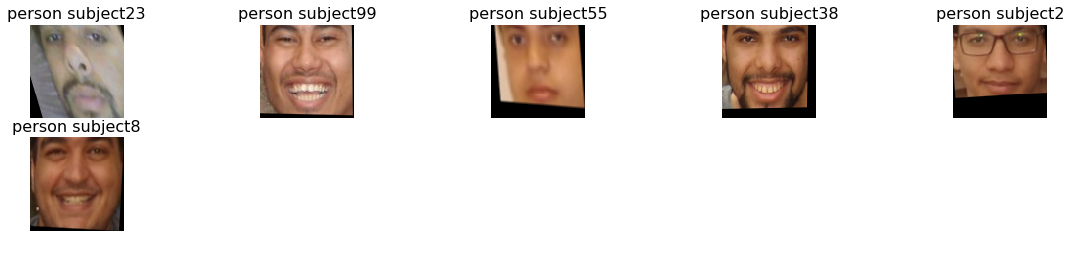

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 10))
columns = 5
rows = 5
for i in range(1, columns*rows+1 ):
    img = imgs[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    plt.title("person {}".format(ids[i-1]), fontsize=16)
    plt.axis('off')
    
plt.suptitle("The people in the dataset", fontsize=22)
plt.show()